# Project Introduction

The question that our group is trying to find the answer for is "What is leading to the decline in cigarette use?". We know that a decline is happening but we want to know why, that way this trend can continue. A couple of hypotheses that we have are that "The rise of e-cigarette use is much larger than the rate of cigarettes not being used" and "Young adults are using e-cigarettes more than those who quit smoking".

The data that we are using is about the use of cigarettes and other types of tobacco throughout the years for different age groups and other demographics. This data comes from the website for the Centers of Disease Control and Prevention (cdc.gov). The data set that we are using contains data about risk factors of tobacco use in the U.S. from 2011-2017; it contains 33,451 rows and has information about tobacco use in each state categorized by race, gender, age, education level, and type of combustible used by %.

# Any Changes

Our scope at the beginning of the project was to find the exact reasons for a lot less people smoking now compared to in previous years, but we realized that it will not be possible to do that in the time we have. So we are just sticking to seeing the percentages of demographics (mainly age) of people that have stopped smoking, switched from smoking to vaping, or simply started vaping throughout the years. In terms of our data, we originally were going to use two datasets but stuck with one of them since it had all of the information that we wanted.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Data Cleaning

In [36]:
tobacco_use = pd.read_csv('Behavioral_Risk_Factor_Data__Tobacco_Use__2011_to_present_.csv')

tobacco_use = tobacco_use[tobacco_use.Data_Value_Footnote_Symbol != '*']
#Removing rows from df which have a small sample size, denoted by '*' in the Data_Value_Footnote_Symbol column

tobacco_use = tobacco_use[tobacco_use.YEAR != '2011-2012']
tobacco_use = tobacco_use[tobacco_use.YEAR != '2012-2013']
tobacco_use = tobacco_use[tobacco_use.YEAR != '2013-2014']
tobacco_use = tobacco_use[tobacco_use.YEAR != '2014-2015']
tobacco_use = tobacco_use[tobacco_use.YEAR != '2015-2016']
tobacco_use = tobacco_use[tobacco_use.YEAR != '2016-2017']
tobacco_use = tobacco_use[tobacco_use.YEAR != 2011]

def drop_columns(tobacco_use): #Function to drop the columns that we do not need
    return tobacco_use.drop(columns = ['LocationDesc', 'TopicType', 'Data_Value_Type', 'Data_Value_Std_Err', 
                                    'Low_Confidence_Limit', 'High_Confidence_Limit', 'GeoLocation', 'TopicId',
                                    'MeasureId', 'StratificationID1', 'StratificationID2', 'StratificationID3',
                                    'StratificationID4', 'SubMeasureID', 'DisplayOrder', 'DataSource',
                                      'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'TopicTypeId'])

tu_df = (tobacco_use.pipe(drop_columns)) #Calling function to drop unneeded columns from df

tu_df.head(10) #Display first 10 elements of the dataframe

,YEAR,LocationAbbr,TopicDesc,MeasureDesc,Response,Data_Value_Unit,Data_Value,Sample_Size,Gender,Race,Age,Education
0,2017,US,Smokeless Tobacco Use (Adults),User Status,Current,%,4.0,NaN,Overall,All Races,All Ages,All Grades
1,2017,US,Smokeless Tobacco Use (Adults),User Status,Not Current,%,96.0,NaN,Overall,All Races,All Ages,All Grades
2,2012,US,Cigarette Use (Adults),Smoking Status,Former,%,25.2,NaN,Overall,All Races,All Ages,All Grades
3,2012,US,Cigarette Use (Adults),Smoking Status,Never,%,54.4,NaN,Overall,All Races,All Ages,All Grades
4,2012,US,Smokeless Tobacco Use (Adults),Current Use,NaN,%,4.1,NaN,Overall,All Races,All Ages,All Grades
5,2012,US,Smokeless Tobacco Use (Adults),User Status,Current,%,4.1,NaN,Overall,All Races,All Ages,All Grades
6,2012,US,Smokeless Tobacco Use (Adults),User Status,Not Current,%,95.9,NaN,Overall,All Races,All Ages,All Grades
15,2016,US,Cessation (Adults),Percent of Former Smokers Among Ever Smokers,NaN,%,60.2,NaN,Overall,All Races,All Ages,All Grades
105,2017,AL,Cigarette Use (Adults),Smoking Status,Current,%,23.4,2598.0,Male,All Races,All Ages,All Grades
158,2016,US,Cessation (Adults),Quit Attempt in Past Year Among Every Day Ciga...,NaN,%,50.9,NaN,Overall,All Races,All Ages,All Grades


# Exploratory Data Analysis

Our data is tabular and contained within .csv files. After some data cleaning, our data has a rectangular structure containing both quantitative and categorical data. It is relatively granular, with some categories such as education and gender able to possibly be further granulized. Also, the scope of our data is relevant to us and is not too expansive since we are concerned with cigarette usage within the US. Our data is relatively faithful, however there are columns in which there are missing/default values.

Text(0, 0.5, 'Percentage of Cigarette Smokers')

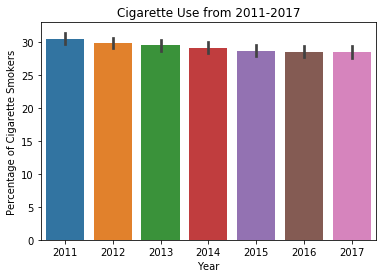

In [37]:
tu_df = tobacco_use[tobacco_use.LocationAbbr != 'US']
tu_df = tobacco_use[tobacco_use.Response != 'Former']
tu_df = tobacco_use[tobacco_use.Response != 'Never']
tu_df = tobacco_use[tobacco_use.TopicDesc == 'Cigarette Use (Adults)']
tu_df.sort_values(by=['YEAR'])

bars = sns.barplot(x='YEAR', y='Data_Value', data=tu_df)

bars.set_title('Cigarette Use from 2011-2017')
bars.set_xlabel('Year')
bars.set_ylabel('Percentage of Cigarette Smokers')

# Visualization

Text(0.5, 1.0, 'Ages 20+ with higher level of education are our biggest audience ')

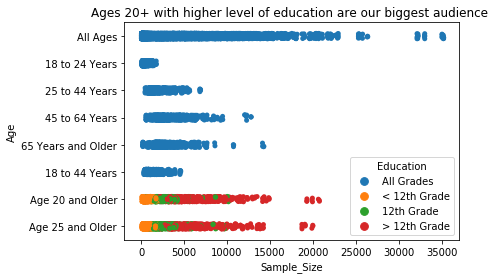

In [38]:
ax = sns.stripplot(x="Sample_Size", y="Age", hue="Education", data=tobacco_use, jitter=True)
ax.set_title('Ages 20+ with higher level of education are our biggest audience ')

# ML Analysis

# Reflection

#### What is hardest part of the project that you’ve encountered so far?
The hardest part of the project we've encountered so far is figuring out how to make visualizations and analyze the data with ML because of how our data was organized. There were a large number of categories and the data was only in percentages.

#### What are your initial insights?
Our initial insights definitely confirm the decline of cigarette smokers but we still need to find out exactly how many people used to smoke and quit and how many people started only with e-cigs.

#### Are there any concrete results you can show at this point? If not, why not?
Not exactly, because of how the data is sorted and how vast it is, we've had trouble finding and organizing exactly what we're looking for. We think we it will be easier if we take time to sort out what data we need and don't need.

#### Going forward, what are the current biggest problems you’re facing?
The biggest problem for us is just how big out data set is and how we can effectively use it.

#### Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
We are a little behind track but once we dedicate some time to sort through all the data that we have then we'll be in a good position.

#### Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why do you think it’s better than your current results?
We do think it is worth it to proceed with our project but we just need to fix the problems that we stated in the previous questions. Then we will get better results for what we're trying to do.

# Next Steps

#### What you plan to accomplish in the next month and how you plan to evaluate whether your project achieved the goals you set for it.
In the next month we plan on having our data sorted in a way where we can most easily look at everything that we want to filter, and then be able to use that more simply. For our plan to evaluate if we achieved our project goals, we will know once we have all our data organized and we get through looking at all the data for our goal of figuring out the correlation between cigarette decline and e-cigarette/vape use through the years.

## Link to Notebook on GitHub
https://github.com/edgeslab/cs418-project-99th-percentile-posse/blob/master/FinalProject.ipynb